# Beer Distribution Game Reinforcement Learning


In [1]:
from BPTK_Py.bptk import bptk 
bptk = bptk()

FloatProgress(value=0.0, bar_style='info', description='Running', max=1.0)

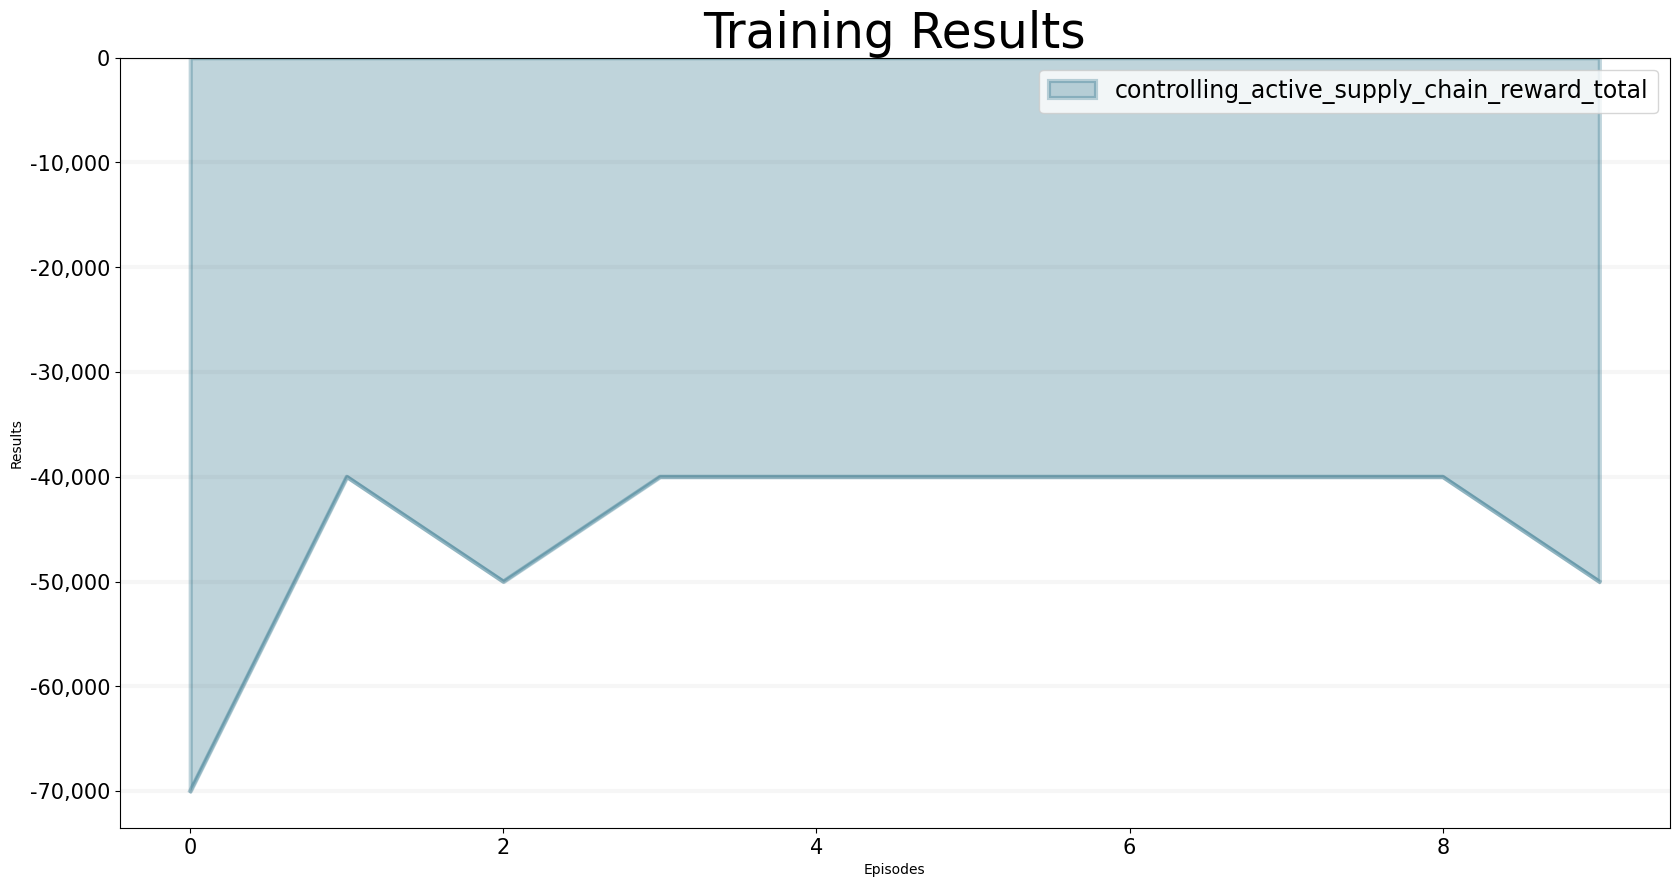

In [2]:
bptk.train_scenarios(
    episodes=10,
    scenario_managers=["smBeergameQlOB"],
    scenarios=["train_agents"],
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["supply_chain_reward"],
    agent_property_types=["total"],
    return_df=False,
    progress_bar=True
)

# Persist Q-Tables

It takes quite some time to train q-tables and they can become quite large:

In [3]:
from src.abm.q_learning_ob.beergame import BeergameQlOB

In [4]:
print("Q-Table Counts")
print("Brewery: {}".format(BeergameQlOB.brewery_q_table.count()))
print("Distributor: {}".format(BeergameQlOB.distributor_q_table.count()))
print("Wholesaler: {}".format(BeergameQlOB.wholesaler_q_table.count()))
print("Retailer: {}".format(BeergameQlOB.retailer_q_table.count()))

Q-Table Counts
Brewery: 4
Distributor: 6
Wholesaler: 6
Retailer: 5


Hence it makes sense to dump the trained q-tables so they can be reused:

In [5]:
BeergameQlOB.dump_q_tables("data/q_tables_10.json","JSON")

# Load Q-Tables

Reset the q-tables:

In [6]:
from src.abm.q_learning_base.sparseQTable import SparseQTable

In [7]:
BeergameQlOB.brewery_q_table=SparseQTable(dimension=1)
BeergameQlOB.distributor_q_table=SparseQTable(dimension=1)
BeergameQlOB.wholesaler_q_table=SparseQTable(dimension=1)
BeergameQlOB.retailer_q_table=SparseQTable(dimension=1)

Load previously saved q-tables:

In [8]:
BeergameQlOB.load_q_tables("data/q_tables_50000.json","JSON")

## Use Training Results

In [9]:
bptk.reset_scenario(scenario_manager="smBeergameQlOB",scenario="smart_agents")

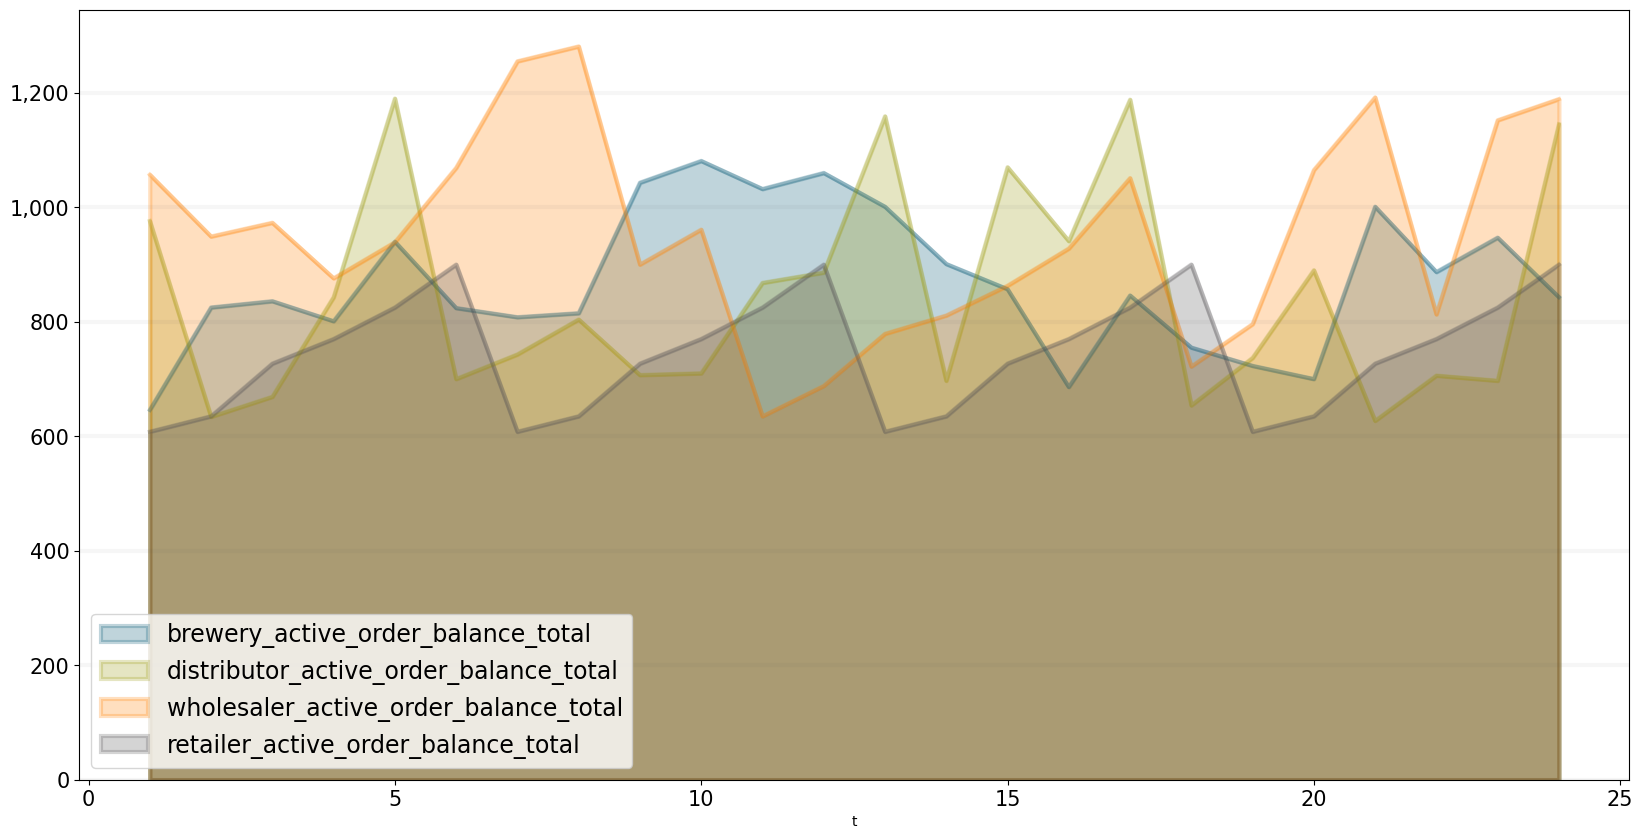

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["brewery","distributor","wholesaler","retailer"],
    agent_states=["active"],
    agent_properties=["order_balance"],
    agent_property_types=["total"]
)

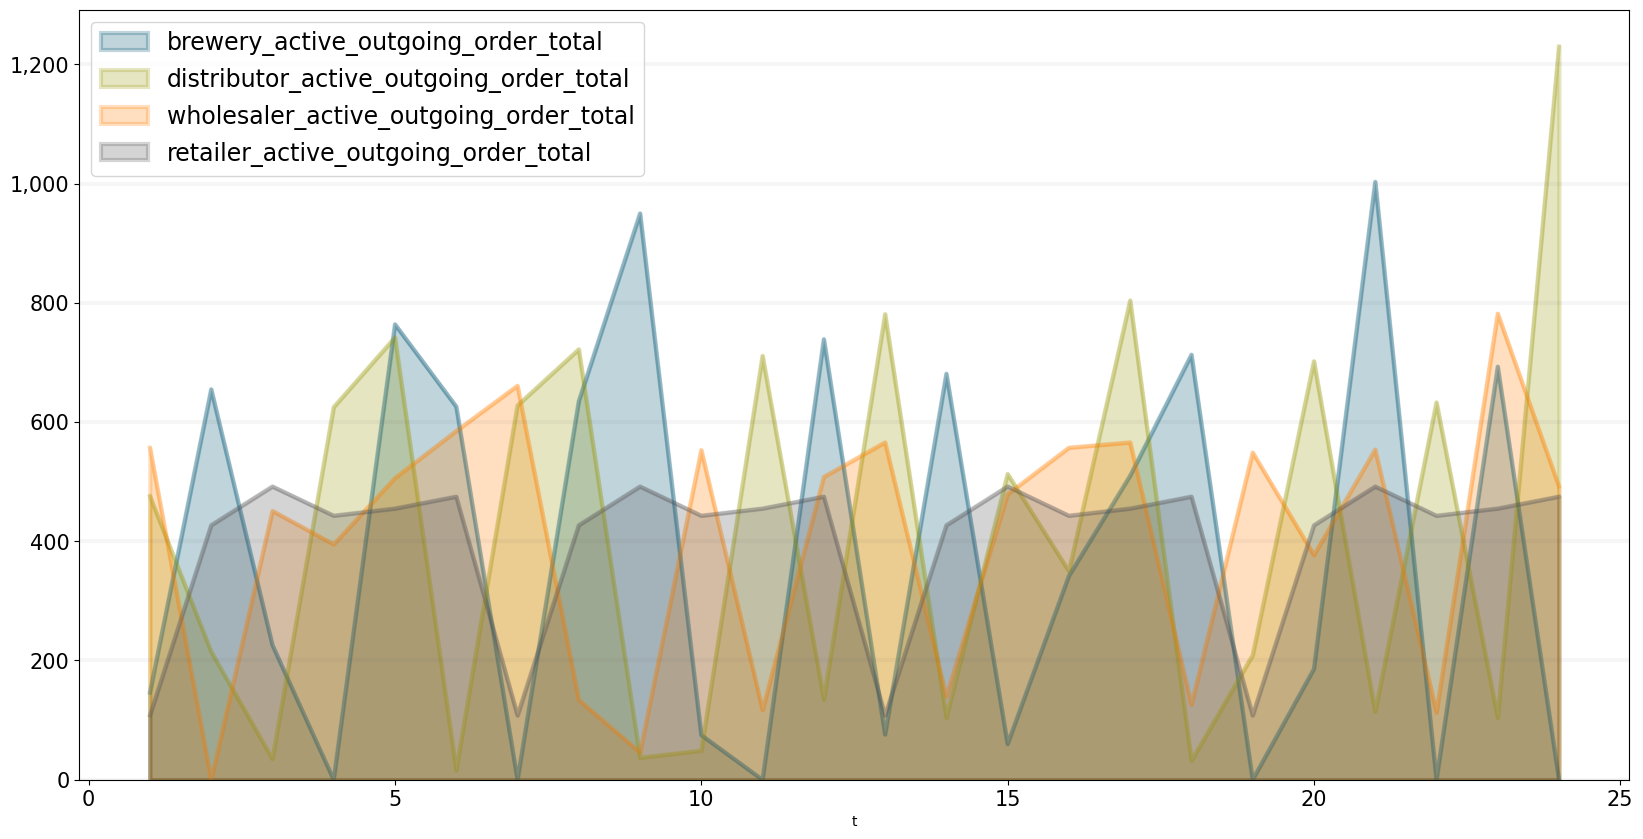

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["brewery","distributor","wholesaler","retailer"],
    agent_states=["active"],
    agent_properties=["outgoing_order"],
    agent_property_types=["total"]
)

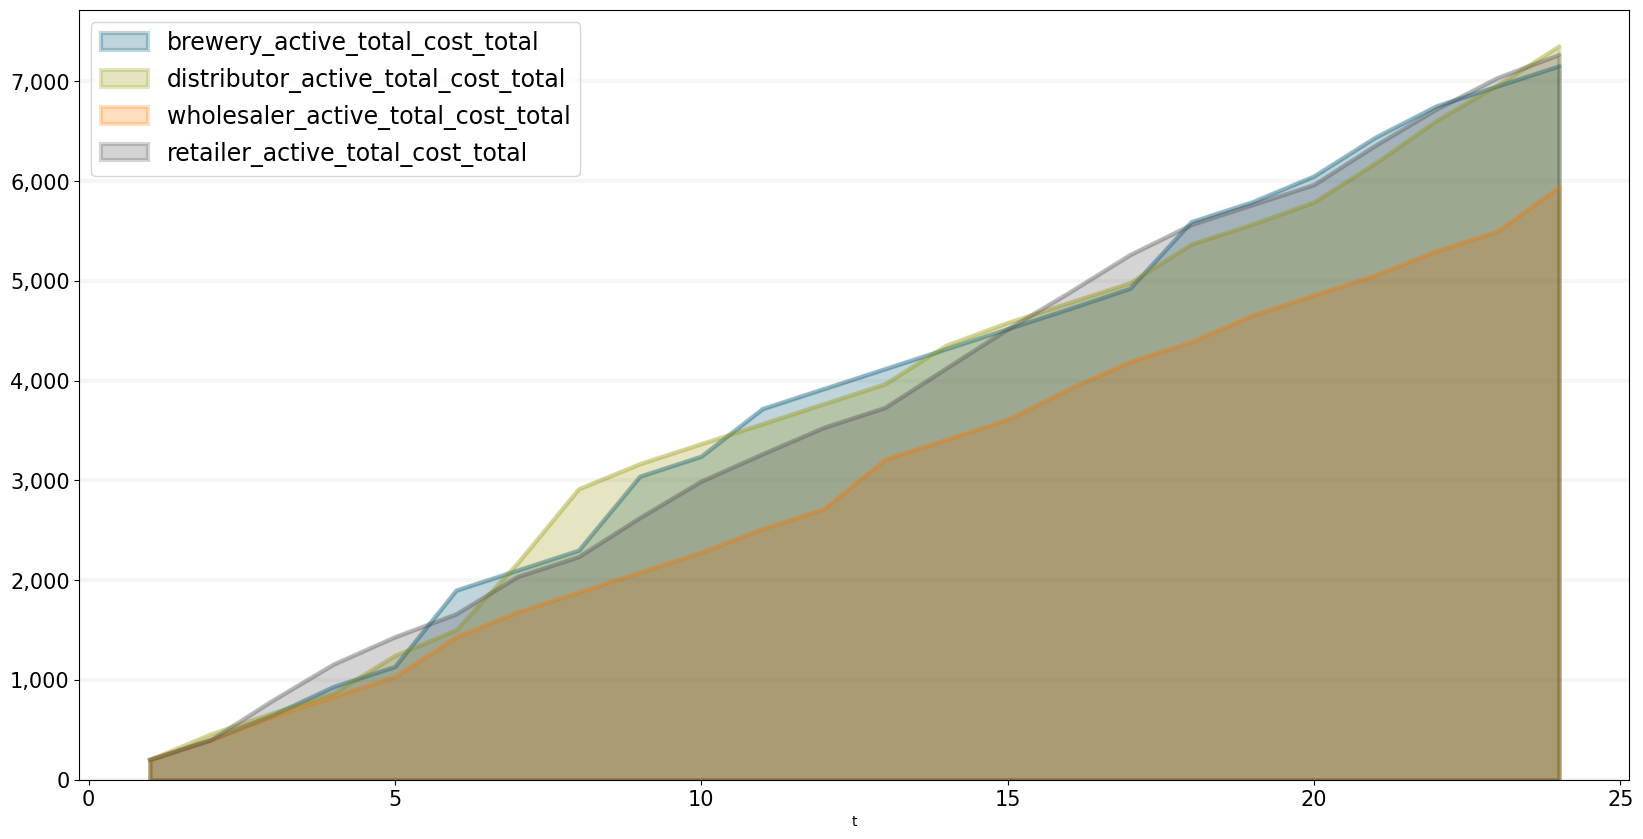

In [12]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["brewery","distributor","wholesaler","retailer"],
    agent_states=["active"],
    agent_properties=["total_cost"],
    agent_property_types=["total"]
)

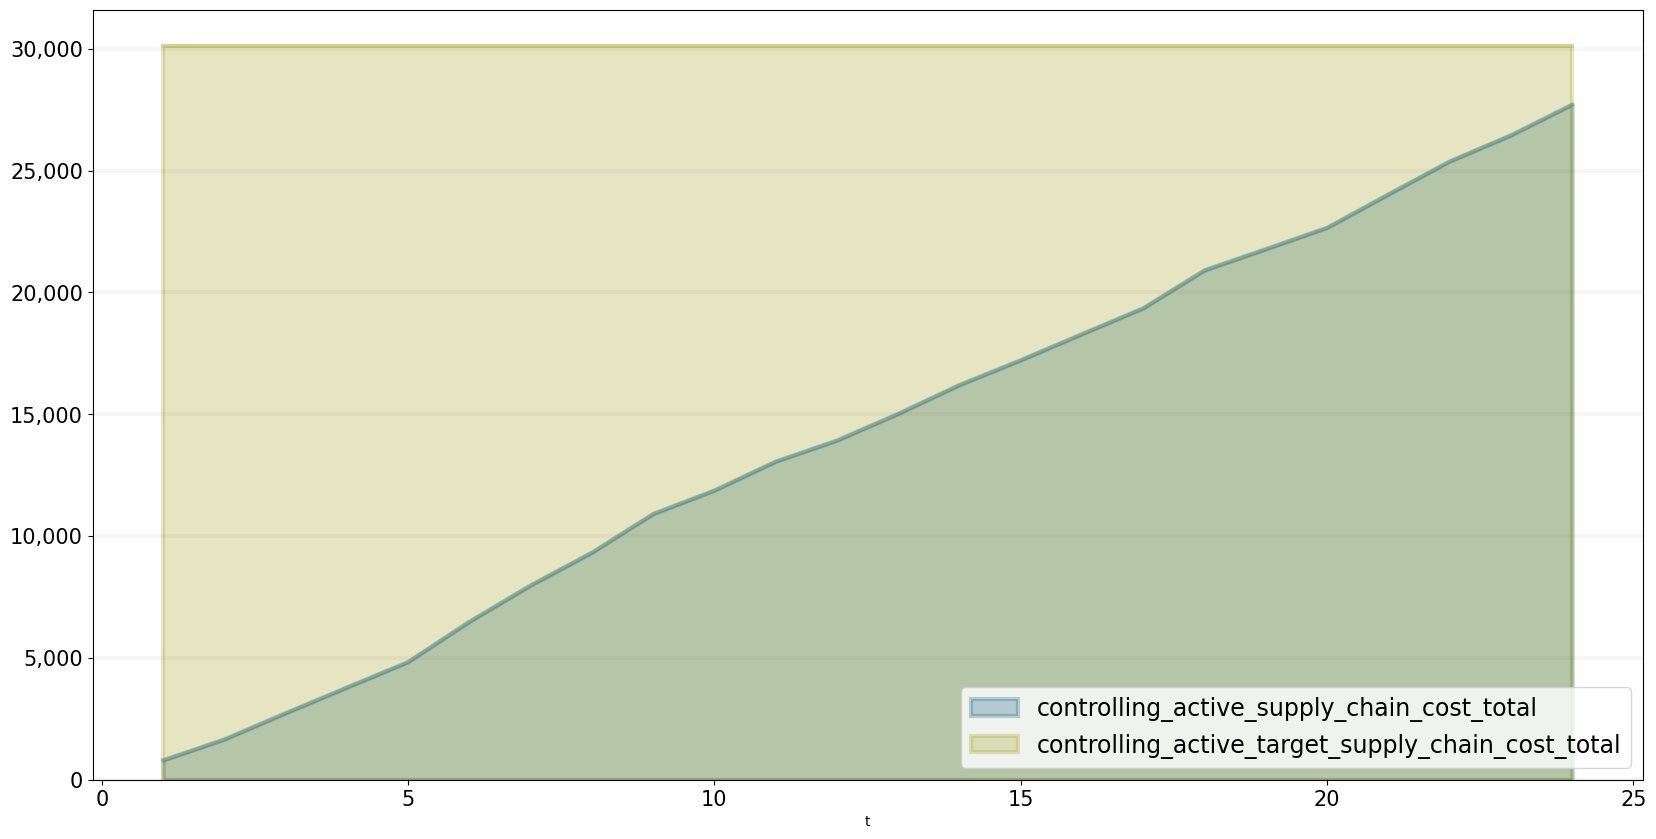

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["supply_chain_cost","target_supply_chain_cost"],
    agent_property_types=["total"]
)

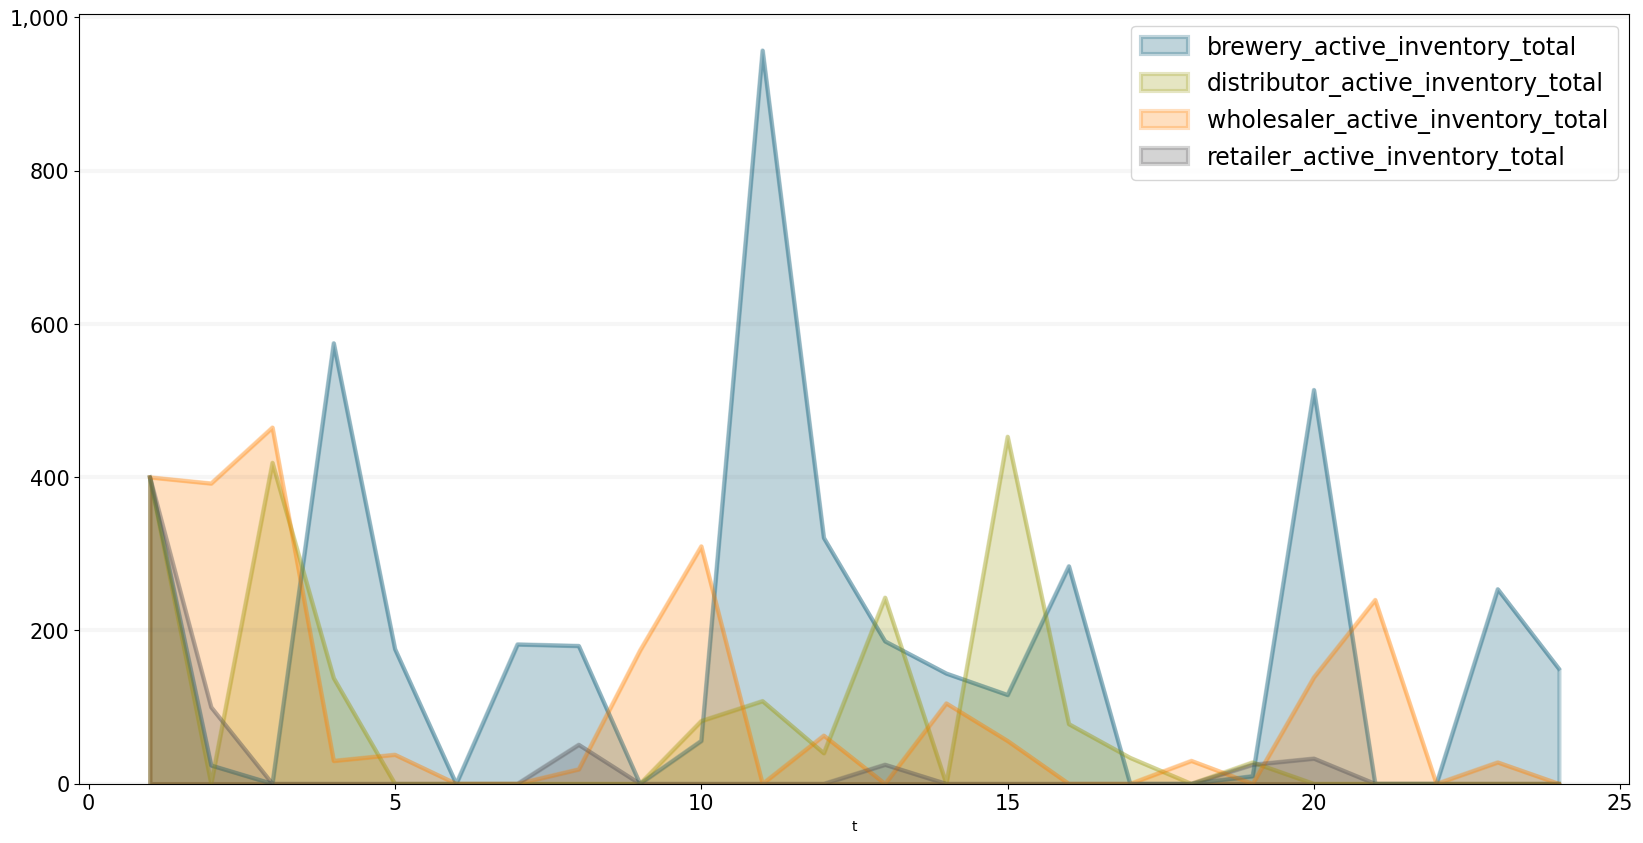

In [14]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["brewery","distributor","wholesaler","retailer"],
    agent_states=["active"],
    agent_properties=["inventory"],
    agent_property_types=["total"]
)

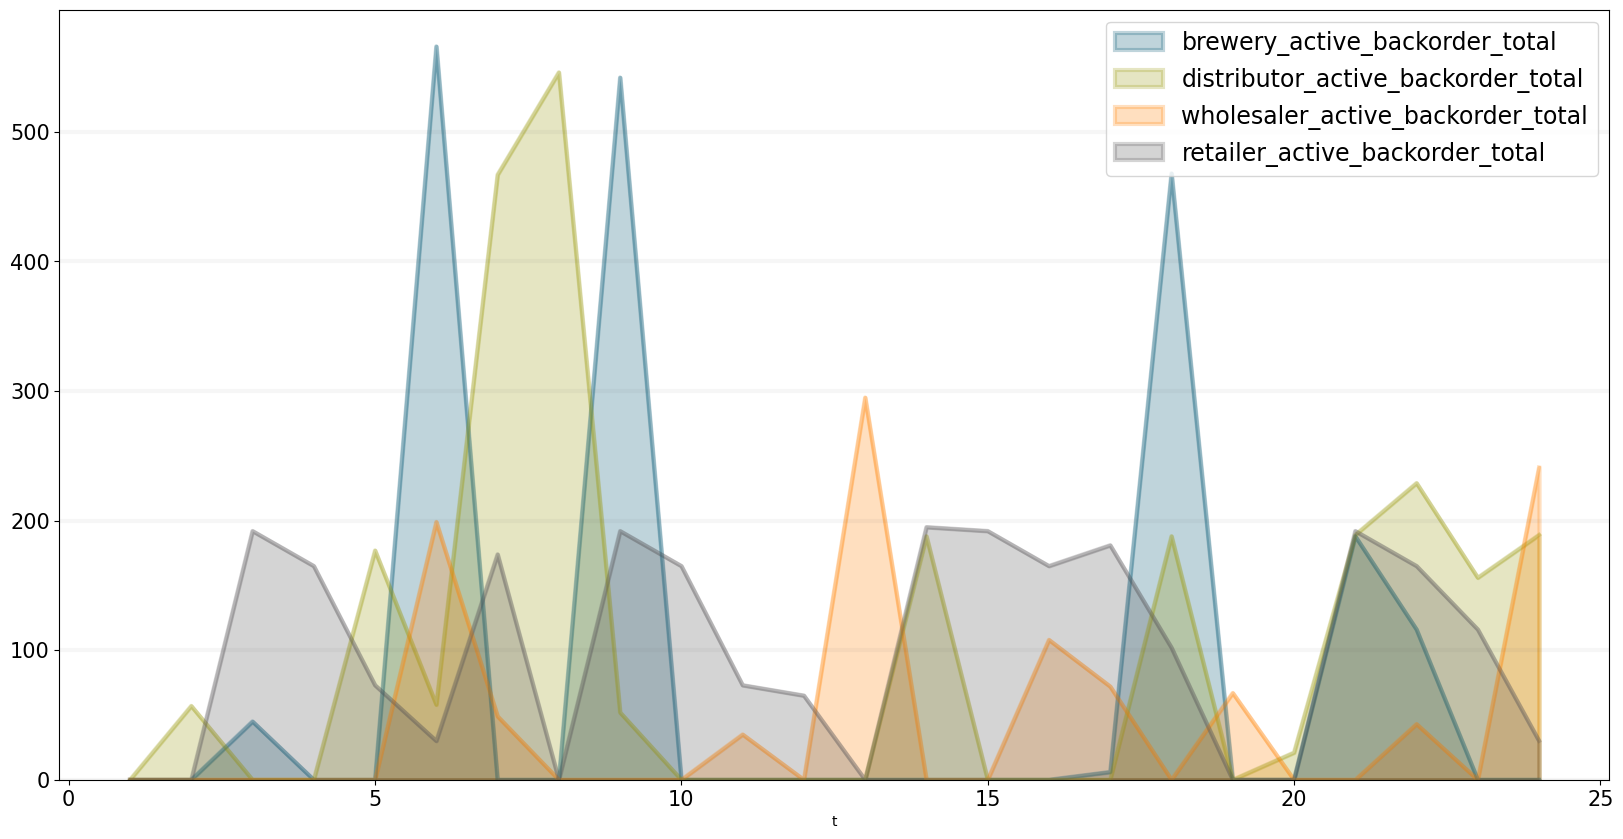

In [15]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameQlOB"],
    kind="area",
    scenarios=["smart_agents"],
    agents=["brewery","distributor","wholesaler","retailer"],
    agent_states=["active"],
    agent_properties=["backorder"],
    agent_property_types=["total"]
)